# ChatBot PestBuster

## Import Library

In [1]:
import pandas as pd
import json
import string
import tensorflow as tf
import matplotlib.pyplot as plt
import random
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder

## Sample Data

In [2]:
with open('data/data.json') as konten:
    data1 = json.load(konten)

### Mengambil semua data ke dalam list

In [3]:
tags = []
inputs = []
responses = {}

for tujuan in data1:
    responses[tujuan['tag']] = tujuan['responses']
    for baris in tujuan['input']:
        inputs.append(baris)
        tags.append(tujuan['tag'])


### Konversi ke dataframe

In [4]:
data = pd.DataFrame({'inputs': inputs, 'tags': tags})

### Print data

In [5]:
data

,inputs,tags
0,hai,salam
1,halo,salam
2,selamat pagi,salam
3,selamat siang,salam
4,selamat sore,salam
5,selamat tinggal,selamat_tinggal
6,sampai jumpa,selamat_tinggal
7,dadah,selamat_tinggal
8,saya pergi dulu,selamat_tinggal
9,terima kasih,terima_kasih


## Pre-processing

In [6]:
data['inputs'] = data['inputs'].apply(
    lambda kata:[huruf.lower() 
                 for huruf in kata 
                 if huruf not in string.punctuation]
    )
data['inputs'] = data['inputs'].apply(
    lambda kata: ''.join(kata)
)

### Print data

In [7]:
data

,inputs,tags
0,hai,salam
1,halo,salam
2,selamat pagi,salam
3,selamat siang,salam
4,selamat sore,salam
5,selamat tinggal,selamat_tinggal
6,sampai jumpa,selamat_tinggal
7,dadah,selamat_tinggal
8,saya pergi dulu,selamat_tinggal
9,terima kasih,terima_kasih


## Tokenize the data

In [8]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(data['inputs'])
train = tokenizer.texts_to_sequences(data['inputs'])

### Masukan padding

In [9]:
x_train = pad_sequences(train)

### Encoding

In [10]:
le = LabelEncoder()
y_train = le.fit_transform(data['tags'])

In [11]:
input_shape = x_train.shape[1]
print(input_shape)

5


### Mendefinisi kosakata

In [12]:
kosakata = len(tokenizer.word_index) + 1
print("Jumlah kata yang unik: ", kosakata)

panjang_output = le.classes_.shape[0]
print("Panjang output: ", panjang_output)

Jumlah kata yang unik:  34
Panjang output:  5


## Build The Model

In [13]:
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(input_shape,)),
    tf.keras.layers.Embedding(kosakata, 128),
    tf.keras.layers.LSTM(128, return_sequences=True),
    tf.keras.layers.LSTM(128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(panjang_output, activation='softmax'),
])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

## Train the model

In [14]:
train = model.fit(
    x_train, y_train,
    epochs=200,
    batch_size=64
)

Epoch 1/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 13s 13s/step - accuracy: 0.2000 - loss: 1.6102
Epoch 2/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step - accuracy: 0.2500 - loss: 1.6033
Epoch 3/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.2500 - loss: 1.5964
Epoch 4/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.2500 - loss: 1.5889
Epoch 5/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - accuracy: 0.2500 - loss: 1.5802
Epoch 6/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.2500 - loss: 1.5699
Epoch 7/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.2500 - loss: 1.5576
Epoch 8/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 0.2500 - loss: 1.5433
Epoch 9/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.2500 - loss: 1.5270
Epoch 10/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step - accuracy: 0.2500 - loss: 1.5092
Epoch 11/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step - accuracy: 0.3000 - loss: 1.4903
Epoch 12/200
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 215ms/step - accuracy: 0.3000 

## Analisis model

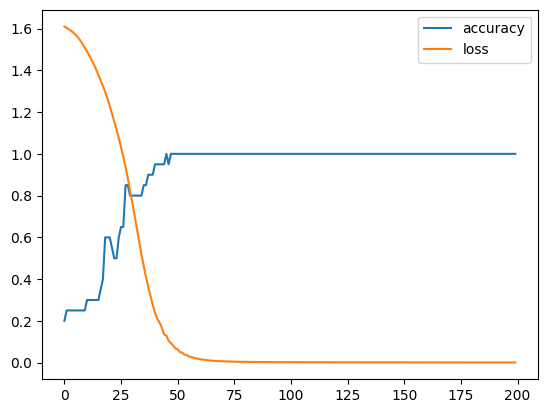

In [15]:
plt.plot(train.history['accuracy'], label='accuracy'),
plt.plot(train.history['loss'], label='loss'),
plt.legend()

## Testing

In [17]:
while True:
    i_kata = []
    input_prediksi = input("Kamu: ")

    # Memeriksa jika input adalah perintah untuk berhenti
    if input_prediksi.lower() in ['stop', 'quit', 'exit', 'goodbye']:
        print("Bot: Sampai jumpa!")
        break

    # Memproses input pengguna
    input_prediksi = [huruf.lower() for huruf in input_prediksi if huruf not in string.punctuation]
    input_prediksi = ''.join(input_prediksi)
    i_kata.append(input_prediksi)

    input_prediksi = tokenizer.texts_to_sequences(i_kata)
    input_prediksi = np.array(input_prediksi).reshape(-1)
    input_prediksi = pad_sequences([input_prediksi], input_shape)

    # Memprediksi respons
    output = model.predict(input_prediksi)
    output = output.argmax()

    respon_tags = le.inverse_transform([output])[0]
    print("Bot:", random.choice(responses[respon_tags]))

    # Mengakhiri jika tag adalah 'goodbye'
    # if respon_tags == 'goodbye':
    #     print("Bot: Sampai jumpa!")
    #     break

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Bot: Selamat datang! Ada yang bisa dibantu?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Bot: Semoga harimu menyenangkan! Sampai jumpa!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Bot: Senang bisa membantu!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Bot: Selamat datang! Ada yang bisa dibantu?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Bot: Kapan saja! Jangan ragu untuk bertanya lagi.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Bot: Selamat datang! Ada yang bisa dibantu?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Bot: Kami buka dari jam 9 pagi hingga 5 sore, Senin sampai Jumat. Ada yang bisa saya bantu?
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Bot: Kami buka dari jam 9 pagi hingga 5 sore, Senin hingga Jumat.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
Bot: Senang bisa membantu!
Bot: Sampai jumpa!
